Pzygotowanie danych:

In [452]:
from sklearn import datasets
bc_data, bc_target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# print(bc_data)

Drzewo decyzyjne dla mean texture, mean symmetry

In [453]:
import pandas as pd

bc_tex_sym_x = pd.DataFrame({"mean texture" : bc_data["mean texture"], "mean symmetry" : bc_data["mean symmetry"]})

from sklearn.model_selection import train_test_split

bc_tex_sym_train_x, bc_tex_sym_test_x, bc_train_y, bc_test_y = train_test_split(bc_tex_sym_x, bc_target, test_size=0.2, random_state=35)

In [454]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [455]:
from sklearn.metrics import f1_score

for i in range(1, 11):
    bc_tree_fin = DecisionTreeClassifier(max_depth=i, random_state=1)
    bc_tree_fin.fit(bc_tex_sym_train_x, bc_train_y)

    list_1 = []
    list_1.append(i)


    list_1.append(f1_score(bc_train_y, bc_tree_fin.predict(bc_tex_sym_train_x)))
    list_1.append(f1_score(bc_test_y, bc_tree_fin.predict(bc_tex_sym_test_x)))

    list_1.append(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))
    list_1.append(bc_tree_fin.score(bc_tex_sym_test_x, bc_test_y))

    print(list_1)

[1, 0.7408906882591093, 0.6935483870967742, 0.7186813186813187, 0.6666666666666666]
[2, 0.8290155440414507, 0.723404255319149, 0.7824175824175824, 0.6578947368421053]
[3, 0.8290155440414507, 0.723404255319149, 0.7824175824175824, 0.6578947368421053]
[4, 0.8421052631578947, 0.7050359712230215, 0.8021978021978022, 0.6403508771929824]
[5, 0.8689883913764511, 0.7172413793103448, 0.8263736263736263, 0.6403508771929824]
[6, 0.8838821490467937, 0.7132867132867133, 0.8527472527472527, 0.6403508771929824]
[7, 0.8971631205673759, 0.7183098591549296, 0.8725274725274725, 0.6491228070175439]
[8, 0.9128014842300557, 0.6616541353383458, 0.8967032967032967, 0.6052631578947368]
[9, 0.9415929203539823, 0.6811594202898551, 0.9274725274725275, 0.6140350877192983]
[10, 0.9579524680073126, 0.6811594202898551, 0.9494505494505494, 0.6140350877192983]


0.7824175824175824


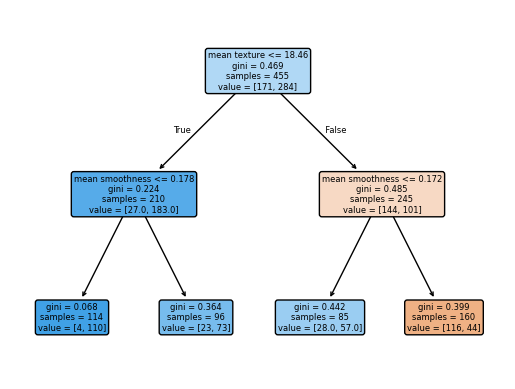

In [456]:
from sklearn.tree import export_graphviz

bc_tree_fin = DecisionTreeClassifier(max_depth=2)
bc_tree_fin.fit(bc_tex_sym_train_x, bc_train_y)

print(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(bc_tree_fin, filled=True, feature_names=["mean texture", "mean smoothness"], rounded=True)
plt.show()
# plt.savefig("bc.png")
export_graphviz(bc_tree_fin, "bc.png")

In [457]:
file_1 = "f1acc_tree.pkl"

list_1 = []
list_1.append(2)

from sklearn.metrics import f1_score

list_1.append(f1_score(bc_train_y, bc_tree_fin.predict(bc_tex_sym_train_x)))
list_1.append(f1_score(bc_test_y, bc_tree_fin.predict(bc_tex_sym_test_x)))

list_1.append(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))
list_1.append(bc_tree_fin.score(bc_tex_sym_test_x, bc_test_y))

print(list_1)

import pickle

with open(file_1, "wb") as file:
    pickle.dump(list_1, file)

[2, 0.8290155440414507, 0.723404255319149, 0.7824175824175824, 0.6578947368421053]


Regresja:

In [458]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
# df.plot.scatter(x='x',y='y')

In [459]:
from sklearn.tree import DecisionTreeRegressor

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df["x"], df["y"], test_size=0.2, random_state=42)

In [460]:
# regression_tree = Pipeline([
#     ("tree", DecisionTreeRegressor())
# ])

# param_grid = {
#     "tree__max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# }

# search_regression_tree = RandomizedSearchCV(
#     regression_tree,
#     param_distributions=param_grid,
#     n_iter = 10,
#     cv = 5,
#     scoring = "neg_mean_squared_error"
# )

df_train_x = df_train_x.values.reshape(-1,1)
df_test_x = df_test_x.values.reshape(-1,1)

# search_regression_tree.fit(df_train_x, df_train_y)
# print(search_regression_tree.best_params_, search_regression_tree.best_score_)

# search_regression_tree.fit(df_test_x, df_test_y)
# print(search_regression_tree.best_params_, search_regression_tree.best_score_)

In [461]:
from sklearn.metrics import mean_squared_error

mse_max = float('inf')
depth = None

for i in range(1, 11):
    regression_tree_fin = DecisionTreeRegressor(max_depth=i, random_state=42)
    regression_tree_fin.fit(df_train_x, df_train_y)

    list_2 = []
    list_2.append(i)

    list_2.append(mean_squared_error(df_train_y, regression_tree_fin.predict(df_train_x)))
    list_2.append(mean_squared_error(df_test_y, regression_tree_fin.predict(df_test_x)))

    if list_2[2] < mse_max:
        depth = i
        mse_max = list_2[2]

    print(list_2, list_2[1]+list_2[2])

print(depth, mse_max)

[1, 110.69056425738387, 150.89162689992511] 261.582191157309
[2, 77.83785094265004, 129.6237763250597] 207.46162726770973
[3, 62.430293375077596, 108.0442916018491] 170.47458497692668
[4, 52.74105191061873, 88.88833784093069] 141.6293897515494
[5, 46.925894249569645, 91.06212647554025] 137.9880207251099
[6, 40.19274646626691, 95.72810218891281] 135.92084865517973
[7, 31.01070782435628, 98.91807147774333] 129.9287793020996
[8, 23.343576986245555, 116.79258958367238] 140.13616656991795
[9, 16.721736976057045, 120.32597016024951] 137.04770713630654
[10, 11.912573126984826, 124.95978066921553] 136.87235379620037
4 88.88833784093069


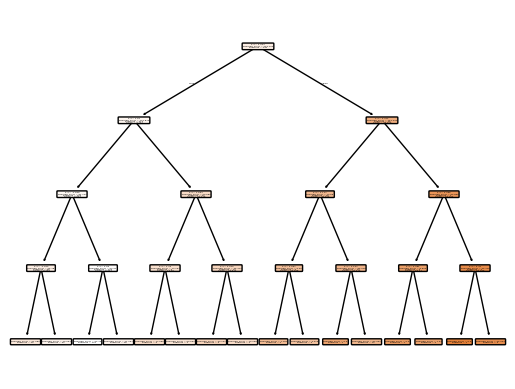

[4, 52.74105191061873, 88.88833784093069] 141.6293897515494


In [ ]:
from sklearn.metrics import mean_squared_error

regression_tree_fin = DecisionTreeRegressor(max_depth=depth, random_state=1)
regression_tree_fin.fit(df_train_x, df_train_y)

file_2 = "mse_tree.pkl"

plt.figure()
plot_tree(regression_tree_fin, filled=True, feature_names=["x"], rounded=True)
plt.show()
# plt.savefig("reg.png")
export_graphviz(regression_tree_fin, "reg.png")

list_2 = []
list_2.append(depth)

list_2.append(mean_squared_error(df_train_y, regression_tree_fin.predict(df_train_x)))
list_2.append(mean_squared_error(df_test_y, regression_tree_fin.predict(df_test_x)))

print(list_2, list_2[1]+list_2[2])

import pickle

with open(file_2, "wb") as file:
    pickle.dump(list_2, file)

Sporządź wykres wszystkich danych z df oraz predykcji regresora, porównaj wyniki z tymi
osiągniętymi dla regresji wielomianowej i KNN z poprzednich ćwiczeń.

In [463]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regression_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=4, include_bias=True)),
    ("regressor", LinearRegression())
])

regression_poly.fit(df['x'].values.reshape(-1,1), df['y'])

line = np.linspace(-2.5, 2.5, 10000)

regression_knn = KNeighborsRegressor(n_neighbors=5)
regression_knn.fit(df['x'].values.reshape(-1,1), df['y'])

KNeighborsRegressor()

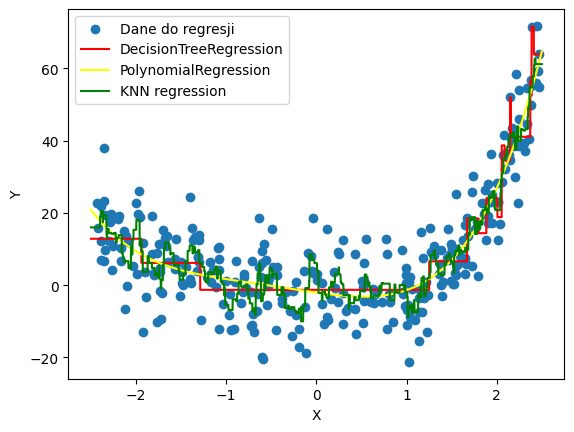

In [464]:
plt.scatter(df['x'], df['y'], label="Dane do regresji")
plt.plot(line, regression_tree_fin.predict(line.reshape(-1, 1)), color='red', label="DecisionTreeRegression")
plt.plot(line, regression_poly.predict(line.reshape(-1,1)), color='yellow', label="PolynomialRegression")
plt.plot(line, regression_knn.predict(line.reshape(-1, 1)), color='green', label="KNN regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()